In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
taxi_df = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep=';',
                 parse_dates=['start_at', 'end_at', 'arrived_at'])

In [28]:
count_all_rides = taxi_df.shape[0]
count_all_rides

23111

1. Проверьте, с какой платформы было сделано больше всего заказов:

In [102]:
source_count = taxi_df \
    .source \
    .value_counts(normalize=True) \
    .mul(100).round(2) \
    .reset_index() \
    .rename(columns={'index': 'source', 'source': 'percentage'})
source_count

,source,percentage
0,iPhone,42.37
1,web,33.20
2,Android,21.35
3,iPad,2.48
4,Wap,0.59


<AxesSubplot:xlabel='source', ylabel='percentage'>

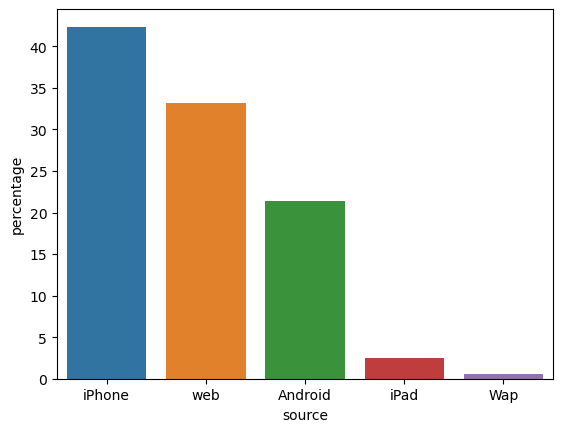

In [104]:
sns.barplot(data=source_count, x='source', y='percentage')

Ответ:

In [105]:
source_count.head(1)

,source,percentage
0,iPhone,42.37


2. Проверьте, какой тип поездки (icon) встречался чаще всего.

<AxesSubplot:xlabel='icon', ylabel='count'>

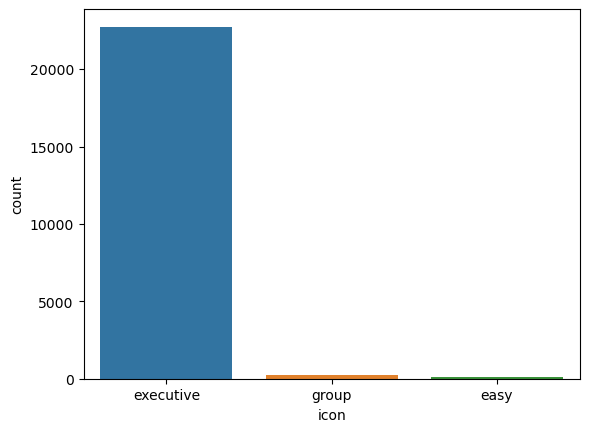

In [52]:
sns.countplot(data=taxi_df, x='icon')

3. Визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).

<AxesSubplot:xlabel='source', ylabel='count'>

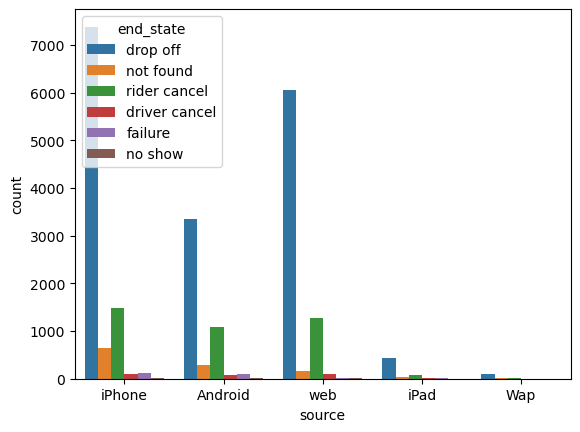

In [54]:
sns.countplot(data=taxi_df, x='source', hue='end_state')

- Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone;
- На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone;
- Больше всего заказов со статусом drop off совершено с платформы iPhone.

4. Проверьте, как распределены оценки водителей (driver_score).

In [79]:
driver_score_counts = taxi_df \
    .driver_score \
    .value_counts(normalize=True) \
    .mul(100).round(2) \
    .reset_index() \
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score')
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


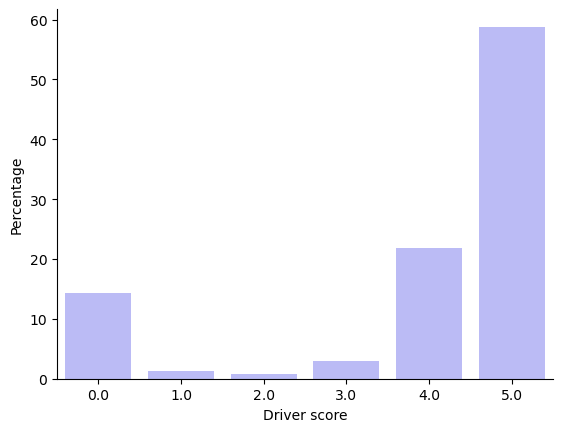

In [84]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.3)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()
plt.show()

5. Проверьте, как распределены оценки клиентов водителями (rider_score).

In [85]:
rider_score_counts = taxi_df \
    .rider_score \
    .value_counts(normalize=True) \
    .mul(100).round(2) \
    .reset_index() \
    .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
    .sort_values('rider_score')
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


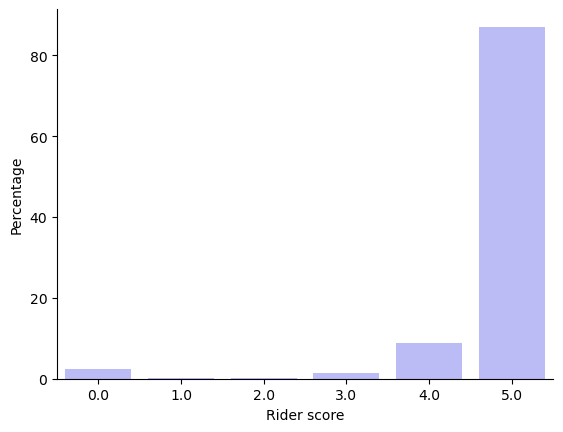

In [86]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.3)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()
plt.show()

В чем отличие распределения оценок клиентов от оценок водителей?
- Водители ставят меньше 0, чем клиенты;
- Более чем в 80% случаев водители поставили клиентам 5 звездочек.